# Breast Cancer Detection 

* In this project we are going to predict whether the patient is in the stage of Breast Cancer M (Malignant) or B (Bengin)

## Data Preprocessing

In [1]:
# Importing the Required Libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns 
import scipy
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify

In [2]:
#Import Data
data=pd.read_csv("https://query.data.world/s/wiwkoek4xh7ywpf7ryykukowxcodoe")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Drop unnecessary columns 
data.drop(["id", "Unnamed: 32"], axis = 1, inplace = True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [6]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [9]:
# Skewness.
for col in data.columns:
    if data[col].dtype != "object":
        print(f"{col}: {scipy.stats.skew(data[col])}")

radius_mean: 0.9398934455576345
texture_mean: 0.6487335672867015
perimeter_mean: 0.9880369541677213
area_mean: 1.6413905092044112
smoothness_mean: 0.4551199203571718
compactness_mean: 1.186983323974523
concavity_mean: 1.3974832352826647
concave points_mean: 1.1680903481012583
symmetry_mean: 0.7236947177154984
fractal_dimension_mean: 1.3010473927890858
radius_se: 3.080463985335206
texture_se: 1.6421002649479612
perimeter_se: 3.4345304746147067
area_se: 5.432815862951913
smoothness_se: 2.308344221045982
compactness_se: 1.8972023914083855
concavity_se: 5.096980949017036
concave points_se: 1.4408668862916998
symmetry_se: 2.189341838925834
fractal_dimension_se: 3.913616654675261
radius_worst: 1.1002050372722139
texture_worst: 0.4970066697616781
perimeter_worst: 1.1251876208771259
area_worst: 1.8544679916096252
smoothness_worst: 0.41433004572343024
compactness_worst: 1.4696674610957545
concavity_worst: 1.147202339994203
concave points_worst: 0.4913159397943974
symmetry_worst: 1.4301448677540

In [10]:
# Kurtosis.
for col in data.columns:
    if data[col].dtype != "object":
        print(f"{col}: {scipy.stats.kurtosis(data[col])}")

radius_mean: 0.8275836739140465
texture_mean: 0.74114542022429
perimeter_mean: 0.9531650486734948
area_mean: 3.609761264823108
smoothness_mean: 0.837945350265711
compactness_mean: 1.6251395163112745
concavity_mean: 1.9705916515788928
concave points_mean: 1.0466802239531967
symmetry_mean: 1.26611697471047
fractal_dimension_mean: 2.9690168982858722
radius_se: 17.52116218962654
texture_se: 5.2917528883273075
perimeter_se: 21.20377481042564
area_se: 48.767195610504245
smoothness_se: 10.367537195466277
compactness_se: 5.050966022625397
concavity_se: 48.42256209241927
concave points_se: 5.070839733646999
symmetry_se: 7.816387992680541
fractal_dimension_se: 26.039949768414576
radius_worst: 0.9252876046135072
texture_worst: 0.2118093780314334
perimeter_worst: 1.0502426838462862
area_worst: 4.347330804638665
smoothness_worst: 0.5027597471319547
compactness_worst: 3.002120208515353
concavity_worst: 1.5905680713088026
concave points_worst: -0.5413670700179054
symmetry_worst: 4.3950732937557495
fr

In [11]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
patients = data.groupby(["diagnosis"]).size().reset_index(name="Count").rename(columns={"Type":"Type"})
patients

,diagnosis,Count
0,B,357
1,M,212


#### Barchart 
This is to show the visual representation of the 2 categories. 

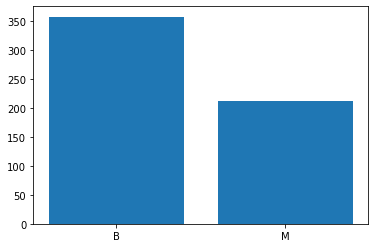

In [13]:
plt.bar(patients["diagnosis"], patients["Count"])
plt.show()

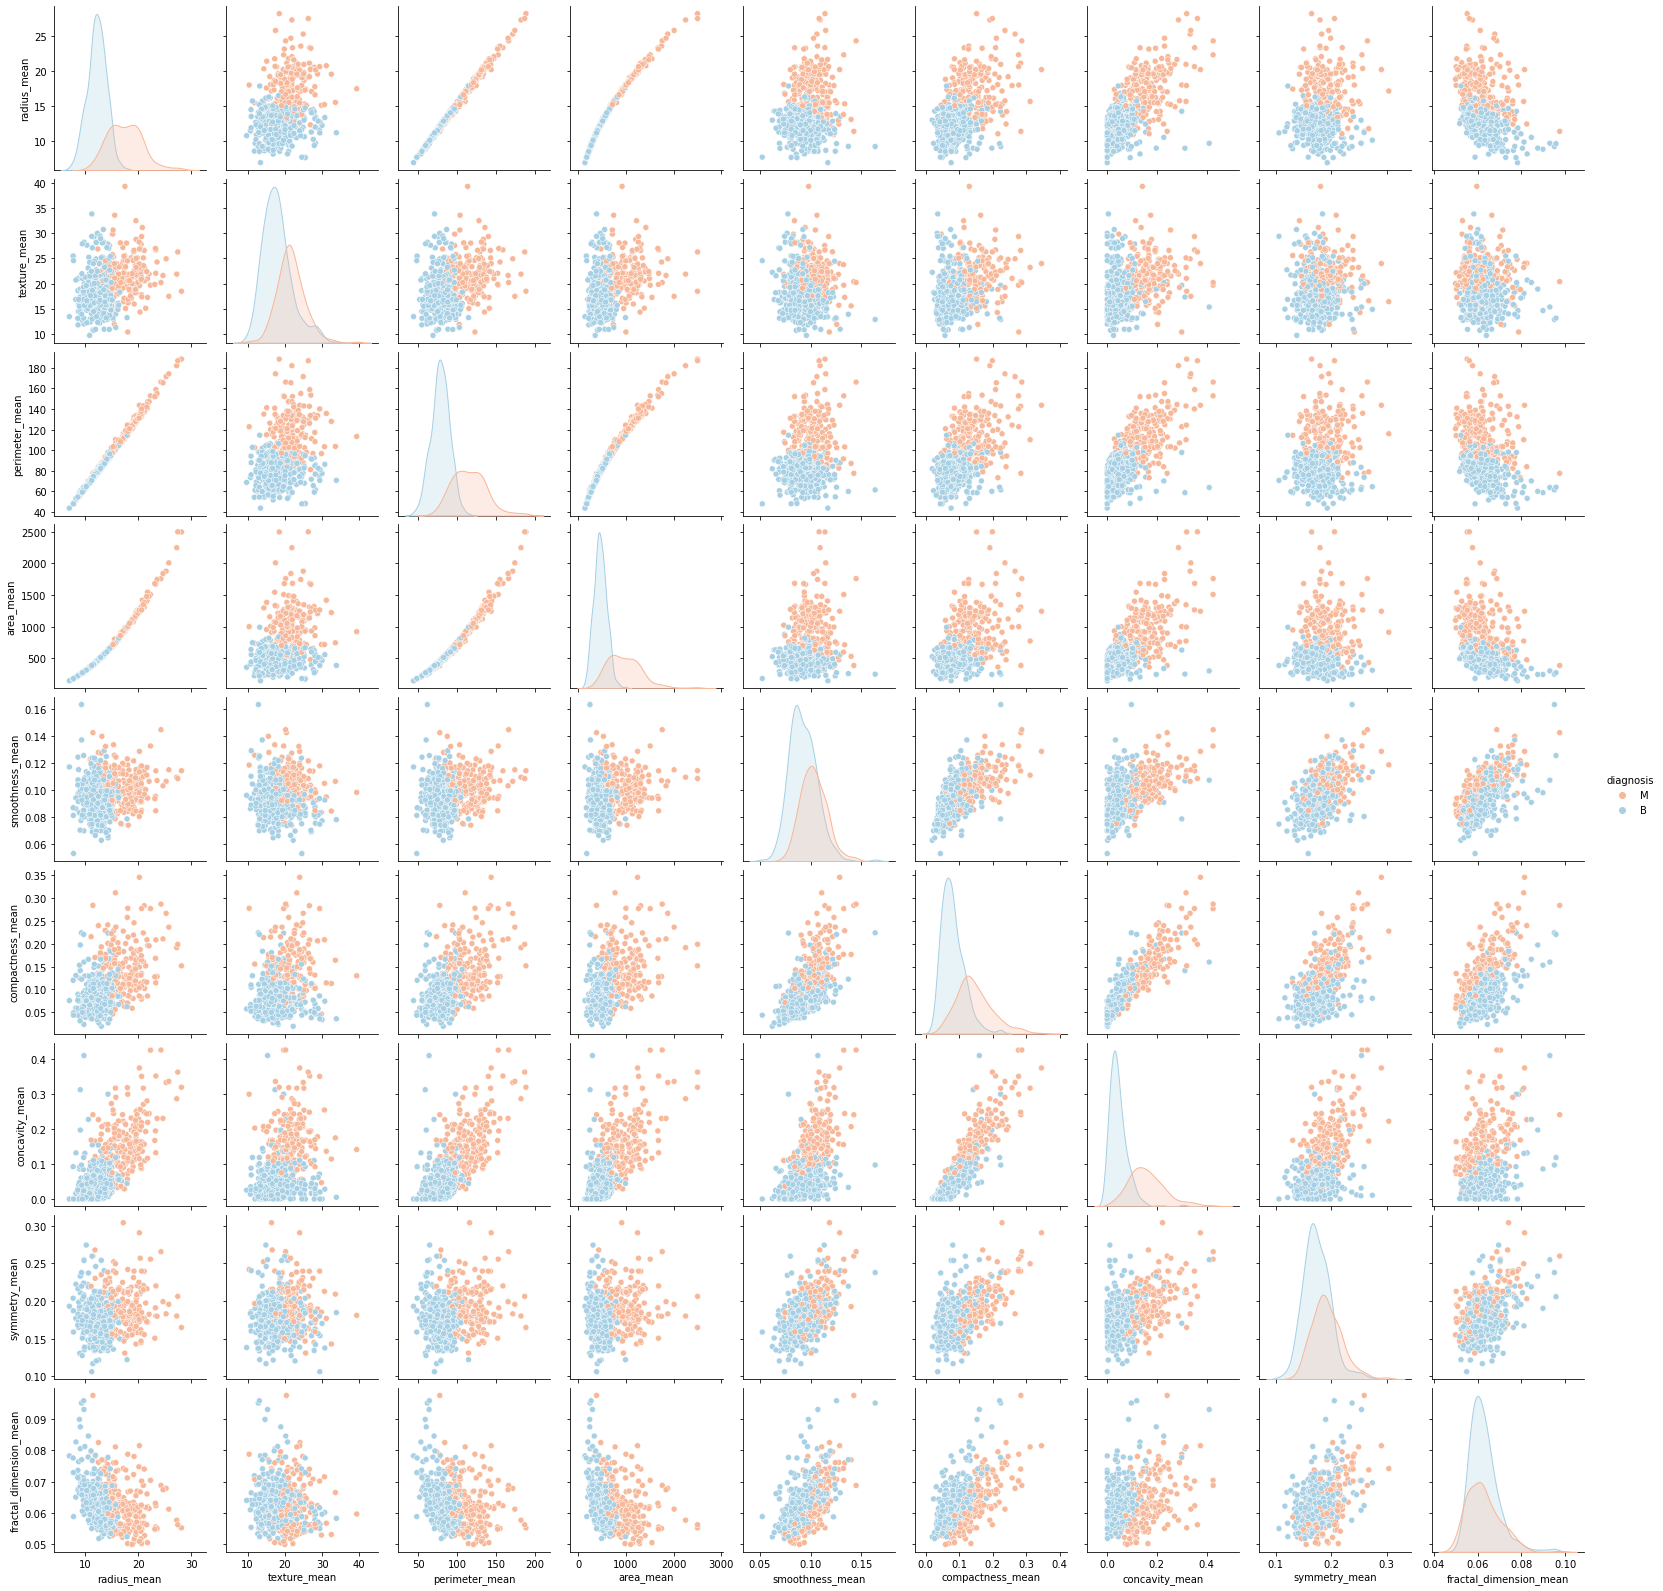

In [14]:
# Genrating a scatter plot matrix with the "mean" columns

# Create a pair plot colored by continent with a density plot of the diagonal and format the scatter plots.

cols = ["diagnosis",
        "radius_mean", 
        "texture_mean", 
        "perimeter_mean", 
        "area_mean", 
        "smoothness_mean", 
        "compactness_mean", 
        "concavity_mean", 
        "symmetry_mean",
        "fractal_dimension_mean"
       ]

sns.pairplot(data = data[cols], hue = "diagnosis", palette = "RdBu")

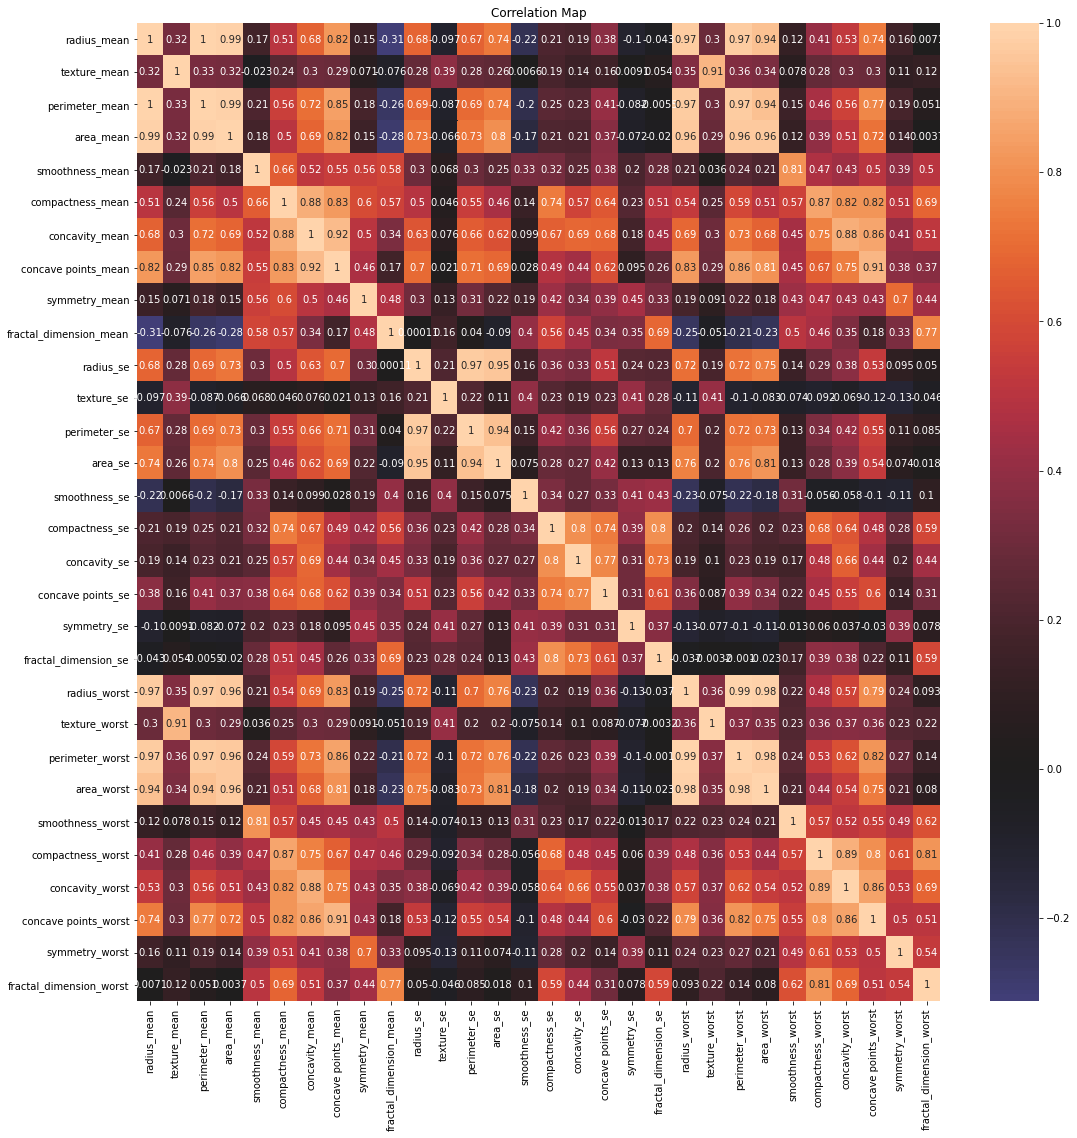

In [15]:
# To get accurate data visualization remove multi colinearity it means remove the duplicate columns
# Check the correlation between features
# Analysis only for features_mean 
# Visualize correlations by heatmap

plt.figure(figsize = (18, 18))
sns.heatmap(data.corr(), center=0, annot=True ) 
plt.title("Correlation Map")
plt.show()

In [16]:
data = data.sample(frac=0.95, random_state=786)
data_unseen = data.drop(data.index).reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (541, 31)
Unseen Data For Predictions (0, 31)


In [17]:
from pycaret.classification import *

In [18]:
clf = setup(data = data, target = "diagnosis",session_id=1229,normalize=True,transformation=True,ignore_low_variance=True,
           remove_multicollinearity=True, multicollinearity_threshold=0.95)

,Description,Value
0,session_id,1229
1,Target,diagnosis
2,Target Type,Binary
3,Label Encoded,"B: 0, M: 1"
4,Original Data,"(541, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [19]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9656,0.9946,0.9371,0.9722,0.9533,0.9261,0.9277,3.5320
svm,SVM - Linear Kernel,0.9656,0.0000,0.9571,0.9531,0.9538,0.9265,0.9281,0.0590
knn,K Neighbors Classifier,0.9603,0.9869,0.9305,0.9670,0.9465,0.9151,0.9176,0.0560
lightgbm,Light Gradient Boosting Machine,0.9603,0.9916,0.9238,0.9733,0.9453,0.9144,0.9180,0.4390
ridge,Ridge Classifier,0.9600,0.0000,0.9224,0.9688,0.9412,0.9116,0.9157,0.0610
lda,Linear Discriminant Analysis,0.9600,0.9887,0.9224,0.9688,0.9412,0.9116,0.9157,0.0380
rf,Random Forest Classifier,0.9550,0.9914,0.9105,0.9741,0.9386,0.9034,0.9075,0.3250
ada,Ada Boost Classifier,0.9550,0.9876,0.9167,0.9662,0.9387,0.9032,0.9064,0.1460
gbc,Gradient Boosting Classifier,0.9550,0.9907,0.9100,0.9729,0.9372,0.9024,0.9069,0.1530
et,Extra Trees Classifier,0.9523,0.9933,0.9029,0.9733,0.9335,0.8967,0.9016,0.2370


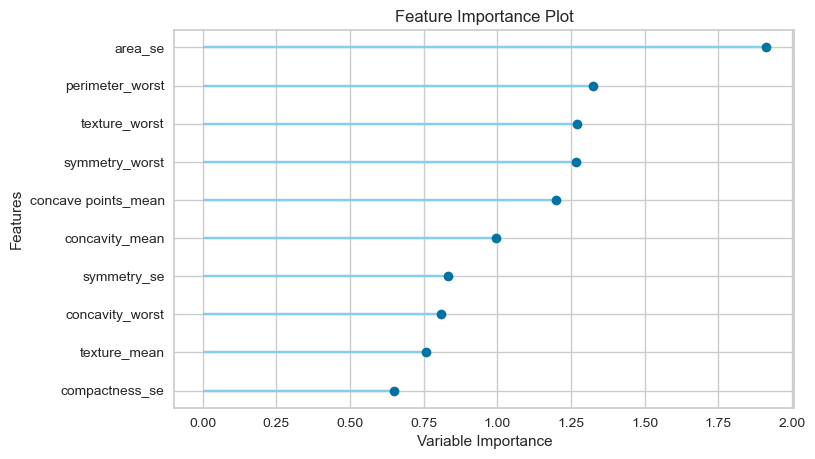

In [20]:
# check feature importance
plot_model(best, plot = "feature")

In [21]:
# finalize the model
final_best = finalize_model(best)
# save model to disk
save_model(final_best, "Breast-Cancer-Pipline")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='diagnosis',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                                        target_variable='diagnosis',
                                        threshold=0.95)),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, cla

In [22]:
!pip install fastapi

In [23]:
!pip install uvicorn

In [24]:
!pip install gunicorn

In [25]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [26]:
# 1. Library imports
import pandas as pd
from pycaret.regression import load_model, predict_model
from fastapi import FastAPI
import uvicorn

# 2. Create the app object
BCancer = FastAPI()

#. Load trained Pipeline
model = load_model("Breast-Cancer-Pipline")

# Define predict function
#  defining a function called predict which will take the input and internally uses PyCaret’s predict_model function to generate predictions and return the value as a dictionary
@BCancer.post("/predict")
def predict(radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,
texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst):
    data = pd.data([[radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,
texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst]])
    data.columns = ["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst",
"texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]

    predictions = predict_model(model, data=data) 
    return {"prediction": int(predictions["label"][0])}

if __name__ == '__main__':
    uvicorn.run(BCancer, host='127.0.0.1', port=8000)

SyntaxError: invalid syntax (<ipython-input-26-eb603809d4a9>, line 18)

In [ ]:
import requests

def get_predictions(radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,
texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst):
    url = "https://breast-cancer-detection-system.herokuapp.com/predict?radius_mean={radius_mean}&texture_mean={texture_mean}&perimeter_mean={perimeter_mean}&area_mean={area_mean}&smoothness_mean={smoothness_mean}&compactness_mean={compactness_mean}&concavity_mean={concavity_mean}&concave_points_mean={concave_points_mean}&symmetry_mean={symmetry_mean}&fractal_dimension_mean={fractal_dimension_mean}&radius_se={radius_se}&texture_se={texture_se}&perimeter_se={perimeter_se}&area_se={area_se}&smoothness_se={smoothness_se}&compactness_se={compactness_se}&concavity_se={concavity_se}&concave_points_se={concave_points_se}&symmetry_se={symmetry_se}&fractal_dimension_se={fractal_dimension_se}&radius_worst={radius_worst}&texture_worst={texture_worst}&perimeter_worst={perimeter_worst}&area_worst={area_worst}&smoothness_worst={smoothness_worst}&compactness_worst={compactness_worst}&concavity_worst={concavity_worst}&concave_points_worst={concave_points_worst}&symmetry_worst={symmetry_worst}&fractal_dimension_worst={fractal_dimension_worst}"\
    .format(radius_mean=radius_mean, texture_mean=texture_mean, perimeter_mean=perimeter_mean, area_mean=area_mean, smoothness_mean=smoothness_mean, compactness_mean=compactness_mean, concavity_mean=concavity_mean, concave_points_mean=concave_points_mean, symmetry_mean=symmetry_mean, fractal_dimension_mean=fractal_dimension_mean, radius_se=radius_se, texture_se=texture_se, perimeter_se=perimeter_se, area_se=area_se, smoothness_se=smoothness_se, compactness_se=compactness_se, concavity_se=concavity_se, concave_points_se=concave_points_se, symmetry_se=symmetry_se, fractal_dimension_se=fractal_dimension_se, radius_worst=radius_worst, texture_worst=texture_worst, perimeter_worst=perimeter_worst, area_worst=area_worst, smoothness_worst=smoothness_worst, compactness_worst=compactness_worst, concavity_worst=concavity_worst, concave_points_worst=concave_points_worst, symmetry_worst=symmetry_worst, fractal_dimension_worst=fractal_dimension_worst)
    
    response = requests.post(url)
    json_response = response.json()
    diagnosis =json_response["prediction"]
    return diagnosis
  

In [ ]:
data.head()

In [ ]:
diagnosis=get_predictions(radius_mean=, texture_mean=texture_mean, perimeter_mean=perimeter_mean, area_mean=area_mean, smoothness_mean=smoothness_mean, compactness_mean=compactness_mean, concavity_mean=concavity_mean, concave_points_mean=concave_points_mean, symmetry_mean=symmetry_mean, fractal_dimension_mean=fractal_dimension_mean, radius_se=radius_se, texture_se=texture_se, perimeter_se=perimeter_se, area_se=area_se, smoothness_se=smoothness_se, compactness_se=compactness_se, concavity_se=concavity_se, concave_points_se=concave_points_se, symmetry_se=symmetry_se, fractal_dimension_se=fractal_dimension_se, radius_worst=radius_worst, texture_worst=texture_worst, perimeter_worst=perimeter_worst, area_worst=area_worst, smoothness_worst=smoothness_worst, compactness_worst=compactness_worst, concavity_worst=concavity_worst, concave_points_worst=concave_points_worst, symmetry_worst=symmetry_worst, fractal_dimension_worst=fractal_dimension_worst)
print(diagnosis)